## Fake News Data Set 


## Library

In [1]:
import re 
import nltk 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics 

[nltk_data] Downloading package punkt to C:\Users\Garvit
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing Data 

In [2]:
df  = pd.read_csv(r'C:\Users\Garvit Anand\Desktop\Machine Learning\ML_Complete\ML_DC\NLP\Course_1\fake_or_real_news.csv')

## Data viewing

In [3]:
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


## Data Information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [5]:
title =  df['title']
text =  df['text']

## Generating Word Cloud of all title's

413534


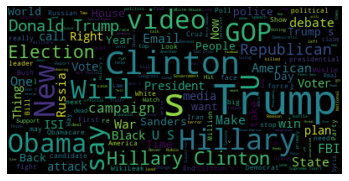

In [6]:
title_combine =  ""
for item in title:
   title_combine =  title_combine + item

# print(title_combine)
print(len(title_combine))
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="black").generate(title_combine)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

## Generating Word cloud of all News Text

In [7]:
# text_combine =  ""
# for item in text:
#     text_combine =  text_combine + item

# print(title_combine)
# print(len(title_combine))
# print(len(text_combine))

## Viweing Info of fake and real news 

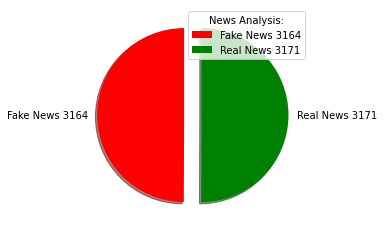

In [8]:
import matplotlib.pyplot as plt
fake_news  =  df[df['label']== "FAKE"]
real_news =  df[df['label'] == "REAL"]
mylabels = ["Fake News 3164", "Real News 3171"]
myexplode = [0.2, 0]
mycolors = ["Red", "Green"]
plt.pie([len(fake_news), len(real_news)], labels = mylabels, colors = mycolors, startangle = 90,  explode = myexplode,  shadow = True)
plt.legend(title = "News Analysis:")
plt.show()

In [9]:
train, test = train_test_split(df, test_size = 0.2)
train.columns.values
train.head()

Unnamed: 0                                              title  \
961         4689  Taking Trump voters’ concerns seriously means ...   
1032        7732  Hillary Isn’t Only One Who Suffers Memory Loss...   
4438        8257  HERE THEY GO AGAIN! Muslims trying to claim th...   
5394        6668  US-led Coalition Killed 300 Civilians in just ...   
3671         826  Four big takeaways from Trump's 'Acela Primary...   

                                                   text label  
961   Donald Trump’s supporters deserve to have thei...  REAL  
1032  You are here: Home / US / Hillary Isn’t Only O...  FAKE  
4438  BNI Store Nov 7 2016 HERE THEY GO AGAIN! Musli...  FAKE  
5394  US-led Coalition Killed 300 Civilians in just ...  FAKE  
3671  Whoever dubbed Tuesday, April 26 the “Acela Pr...  REAL

In [10]:
def refineWords(s):
    letters_only = re.sub("[^a-zA-Z]", " ", s) 
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    print( " ".join( meaningful_words ))
    return( " ".join( meaningful_words ))

train["title"] = train["title"].apply(refineWords)
train["text"] = train["text"].apply(refineWords)

train_two = train.copy()
train.head()


taking trump voters concerns seriously means listening actually saying
hillary one suffers memory loss look bill
go muslims trying claim hebrew language dead sea scrolls arab muslim origin
us led coalition killed civilians air strikes syria amnesty international report finds
four big takeaways trump acela primary triumph
boom president reagan handled protesters negotiate negotiate video percentfedup com
axelrod slow motion implosion republican party
understanding propaganda art distraction disinformation
representative government thugocracy
new yorkers fight overturn ballot selfie ban
scott walker rick perry show limits super pacs
geo engineering unlikely work conservation group says
libertarian ticket eyes post convention opening debate stage
angry right secret playbook uses good story peddle agenda america hates
underestimate power trump rage fueled rise
time press presidential candidates flint water crisis
ammon bundy bodyguard sentenced oregon standoff case
story doj tried thwart f

obama awol paris message america allies care
tensions russia even real
setup dems claim russians undermine elections fake documents showing voter fraud
putin blasts clinton tells u govt stop criticizing russia
massive spike obamacare health premiums could boost trump victory
terrorizing america zika scaremongering washington post admits zika virus cause brain deformities
arise president trump end world know
political upheaval iowa next video
hillary indicted election trump responds fbi investigation
life move soulcycle spin studio motivates students hooking bike sick child life support
media blackout hundreds black teens attack temple u students police horse
comey reopened hillary investigation
libertarian nominees gary johnson bill weld siphon votes trump
critics white house call orlando
bernie sanders big day
iran world powers agree nuclear deal
illegal immigrants could elect hillary
hillary health candidate stumbles boarding campaign plane
public vs media war
rachel maddow made figh

truth apartheid israel says black south african politician
self proclaimed genius reaches new highs stupidity trump puts incompetence full display
iran takes hard stance key provisions nuke deal
juan williams bets trump clinton vice presidential picks
top black lives matter activist incite riots everywhere trump wins
senate democrats got million votes republicans
clinton rails big banks refuses release wall street speeches
days counting civil war matter wins election
project veritas money belize opinion conservative
live iran sanctions shaped life
ted cruz enemy rupert murdoch wsj open fire new gop civil war
politicians nato officials furious spain plans refuel russian battle group tyler durden
technology blackout feared solar storm hits earth
murder shaking san francisco liberal soul
louisiana common core debacle
donald trump president confederacy southern strategy created gop civil war
miss russia russia india report
division tension dnc democrats night unity marred dissent
retiremen

twitter users destroy clinton puppet james comey comeyresign truthfeed
raising social security retirement age really hurt poor
mh debris part missing plane next
trump ups ante indiana
inside bernie sanders quest win nevada latinos
globalization expressway universal slavery
nobody vp debate least american electorate
comment donald trump tells veterans financially brave debbie menon
washington dc workers get weeks paid leave city hall plan taxes businesses
nobel confusion ramos horta trump world disorder
republicans crossing dangerous new line sabotaging us foreign policy
trump surges battleground national polls
white house defends fbi director comey integrity
hillary clinton unlikely indicted private email server
students arrested calif school shooting plot
got best chance clinton think
obamacare back supreme court lives hang balance
elizabeth warren media take answer
defense board white house blocked navy china sea warship passages
gay marriage ruling fallout christian leaders react
tr

make music great trumped album covers
obama pledges faster action new icebreakers keep arctic
ted cruz says woo donald trump supporters
house gop leaders desperate avoid shutdown
everyone getting hammered tonight bad reasons
journalism startup newsbud launches critical nd crowdfund richard brandt
proof gold price based cost supply demand
eu using taxpayer money give muslim invaders turkey free debit cards cash transfers keep europe
trumps hollywood walk fame star destroyed sledgehammer pick
immigration crackdown splits gop
democrats actually enthusiastic republicans trade
western media teleported child victim homs aleppo photos video
hillary never survive trump onslaught fair makes weak nominee
anonymous world war horizon
dear gop hire give debate dreams
scientists claim cancer research largely fraud
new world order melting heat contradiction
trump clinton lost
obama argues goverment shutdown planned parenthood
big problem obama free community college plan ignores
debt paula jones
obam

inside trump bush melodrama decades tension discomfort
mike huckabee gay people friends
ignored voter become absolutely shafted voter
obamacare going affect taxes
amazing baby year old bella moscow easily speaks languages
kentucky election could blot obamacare bright spot
trump controlled mossad
dead radison blu hotel mali
things need know dakota access pipeline protests
bernie sanders unleashing plan make prescription drugs cheaper
senate passes nclb replacement shift states help hurt students video
gop debate fear cauldron according republican candidates going die
despite black lives matter young black americans voting higher numbers
historic nuclear deal reached vienna mean iran
many clinton charity donors also got state department awards hillary
go ahead sue government
marco rubio short circuits g p debate
presstv nato pushes military buildup plans near russia
liberal media mocks republican presidential candidates clown car diss
endingfed news network syndicated news opinion websit

iraq al abadi making person appeal obama financial help
emails found anthony weiner laptop doj blocked foundation probe
republican protester says nearly killed trump says take
death millions yemenis forgotten war
elizabeth warren declares ready hillary clinton running mate
wisconsin could turning point gop race video
iran talks extended another day
ted cruz says motivating conservatives key winning white house
places voter fraud already happened worry
chinese immigrants demand protection paris muggers
donald trump rise white identity politics
house committee votes remind congress job authorize wars
obama announces restrictions distribution military style equipment police
trump smart avoid megyn kelly crushed gop debate
gop lands solid punches sparring clinton benghazi
nestle seeks groundwater expand michigan plant
standoff obama netanyahu deepens despite palestinian state clarification
slain reporter boyfriend calls violence discussion
thanksgiving standing rock
nurse chris christie qu

debate night media want trump fight blood bruises
hhs announces small extension obamacare sign bigger delay next year
senate gop leaving tea party primary battles behind
yemeni forces fire ballistic missile saudi arabia jeddah airport
nevada bad sign bernie sanders political revolution
early primary calendar set change
clinton campaign stunned fbi reportedly reopens probe hillary clinton emails
trump campaign wants salvage ground game expert says damage done
clinton foundation received subpoena state department investigators
texas county enacts emergency paper ballots software glitch voting machines
secret service testing ways intercept rogue drones late night flights washington
pro palestinian propaganda lowering standards truth america
obama bans military equipment sales police
elizabeth warren speech attacking donald trump made bigger argument republicans
tips improve life
sesame seeds knee osteoarthritis
refugees scooped lake erie
rick perry
biden latest signal run president
clinto

facebook lets advertisers exclude users race
gop leadership race gets personal
us led airstrike kills least afghan civilians
hillary clinton shatters fundraising goal
white house dems seek water iran bill
kidding colleges give students safe spaces cry trump win threaten students pro trump chalkings
obama hillary clinton personal email mistake endanger u
democrats crippling obamacare
fact check democrats created twice many jobs republicans since
photo day miss russia international beauty contest tokyo
real police race problem diverse forces white resentment america persistent divides
need know new hampshire primary
far campaigns go win support republican delegate
state emergency declared ferguson police shoot critically injure man protests
ruth bader ginsburg perfect response asked women supreme court
american funhouse manufacturing consent
jaish al fatah leader admits receiving financial military aid saudi arabia
u congressional delegation travels cuba weekend
policies ted cruz shifts 

supreme court trump engulf capitol hill
wall street hollywood media sjws fail stop donald trump becoming america th president
iraqi forces appear close retaking ramadi islamic state
dozens intelligence analysts reportedly claim assessments isis altered
anti clinton revolt among american elites gain momentum
obama slams staples big companies health care shame
making history looks like
report said trump donations vets might shady response predictable
karl rove trump campaign willing change candidate
comey confrontation new third world america corruption feature bug
racists misogynists homophobes absolutely delighted
trump different hillary obama sot
press tv duff un condemnations moderate terrorists
democratic debate national security dominates
media roll welcome mat humanitarian war syria
clinton enjoys post dnc bounce last
crooked hillary campaign used green screen today low turnout rally coconut creek fl
putin latest attack hillary clinton u establishment
christ sufi parable perfectio

future tree shaped vertical farms grow acres crops
democrats need learn defend obama record foreign policy
trump proudly declares people insulted deserved
american way socialism rich free enterprise rest
social media blackout fbi emails trending twitter facebook buzzfeed snapchat
c police shooting radically different response video
delta state shooting shannon lamb kills
new isis video shows paris attackers committing prior atrocities threatening uk
trump vs clinton could reshape electoral map
fbi agent accuses james comey trampling rule law
life lucky break teen boy got another years plan viral coming video
fbi director may sacked intrusion elections
democratic debate takeaways
republicans keep scanning horizon path scrap replace obamacare
hillary clinton wants strong russia wait say
baltimore protests crowds stand firm curfew
donald trump wants beat hillary clinton needs win states
donald trump gop civil war
texas republican calls hillary worst word could ever call woman blames staff

wcd ministry reward married men select anniversary date security question
bernie sanders go
suing vanderbilt university
since donald trump presidency ford shifts truck production mexico ohio endingfed news network
rating obama say success
president obama interview samantha bee rolling floor laughing video
nypd source weiner laptop enough evidence put hillary away life
hillary clinton attempted hack wikileaks delete everything assange
strained u israeli relations go netanyahu victory
jeb bush fights lonely battle defending common core
state duma postponed adoption bill winter tires newspapers
project veritas reveals really behind romney video
barbara mikulski longest serving female senator history retire
global warming worsened california drought scientists say
yes creationists real scientists
podesta relative earned six figure fees lobbying clintons state dept tenure
clinton regrets remark super predators encounter activist
iran letter blowback startles gop
john kasich advice women pre

media coverage gang violence sure looks different perpetrators white
monetary policy time elections
packer lose money carey wants back fee
gop braces trump loss roiled refusal accept election results
way save world save
trump sees biden hillary
gop resistance obamacare working brilliantly
u election thread
us marines deployed norway near russian border first time since world war ii
bombshell leaked emails expose muslims got obama administration
beginning nate silver explains donald trump hacked system created roadmap future political con men
solar winds spur geomagnetic storm may affect power
russia begins airstrikes syria assad request
neil armstrong ships far superior boy big
hillary clinton bribe fbi came virginia confirmed
susan rice u must integrate lgbt rights gov foreign policy
republican convention speakers ivanka newt
deceptive nature hillary clinton right line communism
small stocks threaten breakdown hang
dogs hit escapees scent gas station near prison
ny police investigate 

<ipython-input-10-7e947484180a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = train["title"].apply(refineWords)


donald trump running relatively lean campaign machine despite pledges self fund far able rely outside donations deep pockets campaign finance filings week offered glimpse billionaire businessman running breaking mold campaign third quarter report showed trump raised million period june sept million came individual donations less addition put million money loans contributions since officially launching bid mid june totals show raised million spent million date means spent contributor money money trump though repeatedly said campaign want beholden big money donors whether eventually dig deep personal fortune remains seen general perception money needs however spending less open wallet attention received said anthony corrado professor campaign finance expert colby college maine standing polls allowed essentially ride wave support trump high dollar fundraising events like candidates website solicits donations way individual limit much financial support coming way appears going long way tru

donald trump said week went fifth avenue new york shot someone probably lose votes chose pretty big someone fox news whose offices one block fifth tune thursday night republican debate fox p est iowa last one monday caucuses notice one big elephant room trump man helped fox record million viewers first primary debate campaign season pulled debate getting trump endorser sarah palin might call squirmish fox insistence keeping anchor megyn kelly moderator trump thought kelly treated unfairly first debate fox budge mocked trump saying statement network learned back channel iran russia leaders intent treating trump unfairly became president trump planning using twitter followers see go cabinet meetings enough trump bailed upped showmanship holding alternative event time miles away benefit veterans fox news hosts debate every cable news network broadcasting rights debate probably airing trump event ambien dream karl zahn new hampshire stand comic trump supporter wondered aloud new hampshire 

recipient email playing fire dousing gasoline jumping flaming pit latter piece scmp week asia magazine british forgery heart india china tibetan border dispute proposed title uncle sam plays great game arunachal pradesh make cut piece take visit us ambassador india richard verma opportunity unpack history significance simla convention great britain tibet china imperial episode also saw birth notorious mcmahon line mcmahon line notorious since india unilaterally help united states zero agreement prc asserts mcmahon line indisputable boundary india prc india northeast mcmahon line hot button issue tibetan nationalists well since great britain negotiated directly government tibet supporting mcmahon line delivers dual benefits supporting narrative existence recognized independent tibetan government giving aid comfort tibetan diaspora indian patron actual situation significant consequence mcmahon line complicated believe accessible thanks deft historical research several scholars despite li

november days away traditionally busiest day year guy fawkes effigy industry finally collapsed years steady decline remaining effigy production stations street corners closed immediate effect hundreds year old street urchins laid despite attempts buy outs foreign effigy firms thought collapse due unrealistic pricing structure completely failed take account inflation economist james hampton told us looked figures agree fault clearly lies pricing level frankly penny guy barely covers raw materials effigy time factored wooden trolley actually making loss tragic thing still market need life size cloth dolls catholic terrorists th century however taking account production marketing costs realistic proposition would guy euros collapse comes time foreign effigy manufactures taking increasing orders effigies presidents prime ministers book authors cartoonists apple recently launched iguy self combusting usable electronic effigy connected icloud mutter heresy consumed flames effigy workforce to

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



last time carly fiorina former hewlett packard chief executive sketched foreign policy blueprint one thousand people heard condemn slow training anti islamic state forces ambitions china wonky tooth tail ratio military power military bureaucracy sober serious basically ignored like much summer political news fiorina july speech subsumed donald trump inspired fraction news searches rolling stone attracted last week quoted trump seemingly making fun looks according google trends data rise trump retired neurosurgeon ben carson two first time candidates prefer broad strokes policy debates left republican establishment looking confused helpless originally expecting clash ideas among diverse talented field establishment national security brahmins paired candidates got work blown conversation trump left republicans hoping wednesday debate break fever change tenor race flashy substantive hugh hewitt syndicated orange county radio host co moderate event promised grill candidates geopolitics wor

legislators states republicans hold total control plan push series aggressive policy initiatives coming year aimed limiting power federal government rekindling culture wars unprecedented breadth republican majority party controls governorships partisan legislative chambers guarantees new tide conservative laws republicans plan launch fresh assault common core education standards press abortion regulations cut personal corporate income taxes take dozens measures challenging power labor unions environmental protection agency election day gop controlled partisan legislative chambers across country increase gives republicans six chambers previous record modern era set special elections republicans also reduced number states democrats control governor office legislatures seven republicans least nine states planning use power pass right work legislation would allow employees opt joining labor union twenty four states already laws books new measures proposed wisconsin new mexico new hampshire

white house acknowledged monday erred sending higher level representative massive rally paris islamic terrorism facing bipartisan criticism meager u presence march attended world leaders sent someone higher profile press secretary josh earnest said monday also explained planning rally began short notice president obama personal attendance given security challenges would significant impact march earnest said hours prepare suggested outdoor event large crowds posed security risks earnest said u still stands four square behind allies france rally sunday historic show unity drew million people none higher representing u ambassador france administration dispatched attorney general eric holder top homeland security official paris meetings weekend u official note attend sunday rally ambassador jane hartley white house say holder attend march suggesting top official gone secretary state john kerry initially dismissed criticism quibbling announced trip french capital later week spokesman u emba

breaking doj says help review k emails breaking doj says help review k emails breaking news amy moreno october oh great biased doj going help fbi go k emails want hurry unsettling smells rigged favors loretta lynch friday fbi announced reopening email investigation hillary mishandling classified information statement fbi said discovered new emails pertinent earlier investigation several devices know k emails found huma anthony private computer feel doj helping sift emails say hell breaking justice dept says dedicate needed resources quickly review emails clinton case ap movement political outsiders fighting failed global establishment join resistance help us fight put america first amy moreno published author pug lover game thrones nerd follow twitter facebook support trump movement help us fight liberal media bias please like share story facebook twitter
news date discovery october location discovery bancroft crater earths moon google earth coordinates n w found entrance underground a

british banker took g cocaine torturing killing prostitute court british banker took g cocaine torturing killing prostitute court told british banker rurik jutting took grams cocaine torturing killing prostitute hong kong court heard also alleged harbored fantasies returning uk kidnap abuse teenage girls year old trial murder two indonesian women flat former british colony finance hub video seen authorities jutting heard bragging massive amount cocaine taken course three day torture first victim year old sumarti ningsih told police derived sense enjoyment never actions knew would kill read jutting formerly banker bank america merrill lynch studied university cambridge denied murder admitted manslaughter arrested bodies ningsih second indonesian woman year old seneng mujiasih found apartment interview tapes played courtroom reveal jutting thought processes killings unlucky person flat realized physically hurting someone cocaine something gained satisfaction said first victim medical exp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
XTrain = train['text']
YTrain = train['label']

XTrain.head() 

961     donald trump supporters deserve concerns taken...
1032    home us hillary one suffers memory loss look b...
4438    bni store nov go muslims trying claim hebrew l...
5394    us led coalition killed civilians air strikes ...
3671    whoever dubbed tuesday april acela primary fiv...
Name: text, dtype: object

In [12]:
YTrain.head()

961     REAL
1032    FAKE
4438    FAKE
5394    FAKE
3671    REAL
Name: label, dtype: object

In [13]:
vectorizer = CountVectorizer().fit(XTrain)
XTrain_vectorized = vectorizer.transform(XTrain)

print('Vocabulary len:', len(vectorizer.get_feature_names()))
print('Longest word:', max(vectorizer.vocabulary_, key=len))


Vocabulary len: 59162
Longest word: globalsuperemploymentvacanciesreportsworld


In [14]:
transformer = TfidfTransformer(smooth_idf = False)
tfidf = transformer.fit_transform(XTrain_vectorized)
model = MultinomialNB(alpha=0.1)
model.fit(XTrain_vectorized, YTrain)

MultinomialNB(alpha=0.1)

In [15]:
XTest = test['text']
YTest = test['label']
YPred = model.predict(vectorizer.transform(XTest))
print('Accuracy: %.2f%%' % (accuracy_score(YTest, YPred) * 100))

Accuracy: 88.87%


# Course 1: Introduction To NLP In Python

In [22]:
import re 
my_string = "Name is Garvit Anand, contact no is 911 and email is xyz@gmail.com"
PATTERN =  r"\w+"
re.findall(PATTERN, my_string)

['Name',
 'is',
 'Garvit',
 'Anand',
 'contact',
 'no',
 'is',
 '911',
 'and',
 'email',
 'is',
 'xyz',
 'gmail',
 'com']

In [23]:
PATTERN =  r"\s+"
re.findall(PATTERN, my_string)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [24]:
PATTERN =  r"\[a-z]"
re.findall(PATTERN, my_string)

[]

In [25]:
PATTERN =  r"\w"
re.findall(PATTERN, my_string)

['N',
 'a',
 'm',
 'e',
 'i',
 's',
 'G',
 'a',
 'r',
 'v',
 'i',
 't',
 'A',
 'n',
 'a',
 'n',
 'd',
 'c',
 'o',
 'n',
 't',
 'a',
 'c',
 't',
 'n',
 'o',
 'i',
 's',
 '9',
 '1',
 '1',
 'a',
 'n',
 'd',
 'e',
 'm',
 'a',
 'i',
 'l',
 'i',
 's',
 'x',
 'y',
 'z',
 'g',
 'm',
 'a',
 'i',
 'l',
 'c',
 'o',
 'm']

In [26]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))
print()
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))
print()
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))
print()
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['Name is Garvit Anand, contact no is 911 and email is xyz@gmail', 'com']

['Name', 'Garvit', 'Anand']

['Name', 'is', 'Garvit', 'Anand,', 'contact', 'no', 'is', '911', 'and', 'email', 'is', 'xyz@gmail.com']

['911']


In [27]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
print(word_tokenize("Hi there!"))

['Hi', 'there', '!']


[nltk_data] Downloading package punkt to C:\Users\Garvit
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
